# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [6]:
from scipy.stats import uniform
from numpy import random
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.88052818 2.35183287 2.47060075 2.94832323 2.63836492 2.04765872
 2.64411319 2.44797221 2.43678353 2.77880428]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [7]:
#1.
def generate_uniform_randoms(bottom, ceiling, count):
    x = np.random.uniform(size=count)
    randoms = bottom + (ceiling - bottom) * x
    return randoms


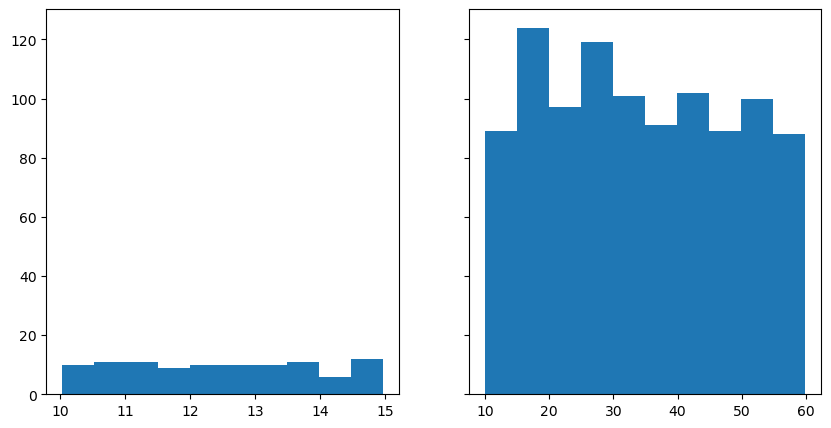

In [8]:
#2. Parameter sets
params_set_1 = (10, 15, 100)
params_set_2 = (10, 60, 1000)


randoms_set_1 = generate_uniform_randoms(*params_set_1)
randoms_set_2 = generate_uniform_randoms(*params_set_2)

#3. plot uniform distributions

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)

ax[0].hist(randoms_set_1, bins=10)
ax[1].hist(randoms_set_2, bins=10)
plt.show()

How are the two distributions different?

***My Insights***

- The two distributions are different due to variations in the parameters used to generate the random numbers.

- Range of Values: In Distribution 1, the range of values is limited between 10 and 15, which means all generated random numbers will fall within this range. In Distribution 2, the range is wider, spanning from 10 to 60.

- Number of Samples: Distribution 1 generates 100 random numbers, while Distribution 2 generates 1000. This means Distribution 2 will have a larger sample size to draw from, potentially leading to a smoother and more accurate representation of the uniform distribution.

- Distribution Shape: Distribution 1's histogram will likely show a more concentrated distribution of values between 10 and 15, since that's the specified range. Distribution 2's histogram will show a spread of values across the wider range from 10 to 60.

- Frequency: Due to the larger sample size in Distribution 2, the histogram bars may be taller and more evenly distributed, reflecting the larger number of random numbers generated within the wider range.

The main differences between the two distributions are the range of values and the number of random numbers generated, which will influence the shape and spread of the histograms when visualized.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

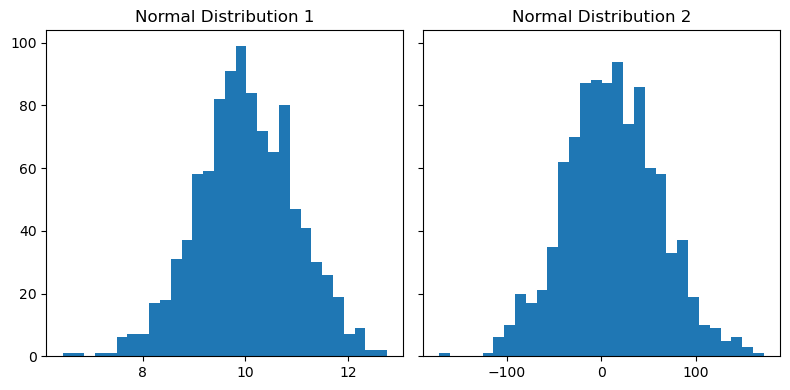

In [20]:
def generate_normal_randoms(mean, std_dev, count):
    return np.random.normal(mean, std_dev, count)

mean_1 = 10
std_dev_1 = 1
count = 1000

mean_2 = 10
std_dev_2 = 50

randoms_1 = generate_normal_randoms(mean_1, std_dev_1, count)
randoms_2 = generate_normal_randoms(mean_2, std_dev_2, count)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)
ax[0].hist(randoms_1, bins=30, label=f"Mean = {mean_1}, Std Dev = {std_dev_1}")
ax[1].hist(randoms_2, bins=30, label=f"Mean = {mean_2}, Std Dev = {std_dev_2}")

ax[0].set_title("Normal Distribution 1")
ax[1].set_title("Normal Distribution 2")

ax[0].set_xticks([8, 10, 12])  
ax[1].set_xticks([-100, 0, 100])

plt.tight_layout()
plt.show()


How are the two distributions different?

In [10]:
# your answer here:
#The first distribution will appear narrower and more centered around the mean, while the second distribution will be wider and potentially show signs of skewness.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [11]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(3)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


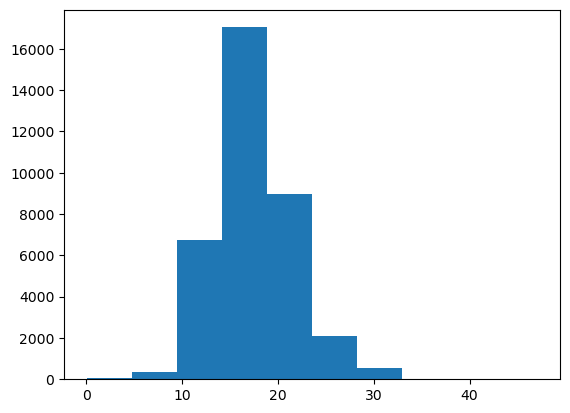

In [12]:
plt.hist(vehicles['Fuel Barrels/Year'])
plt.show()

2. CO2 Emission Grams/Mile 

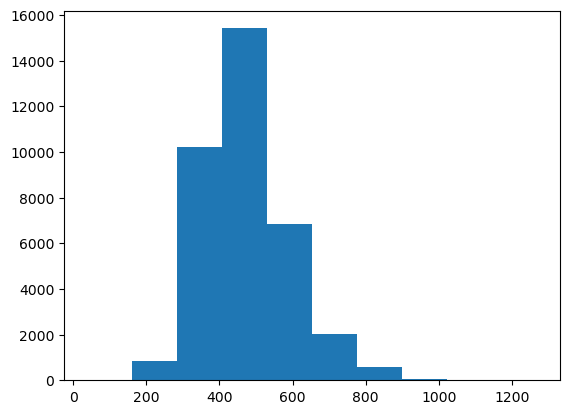

In [13]:
plt.hist(vehicles['CO2 Emission Grams/Mile'])
plt.show()


3. Combined MPG

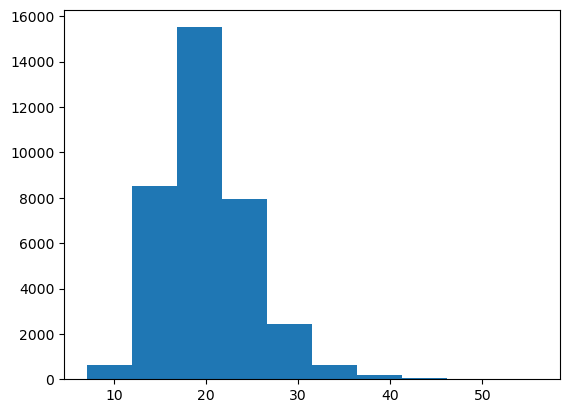

In [14]:
plt.hist(vehicles['Combined MPG'])
plt.show()


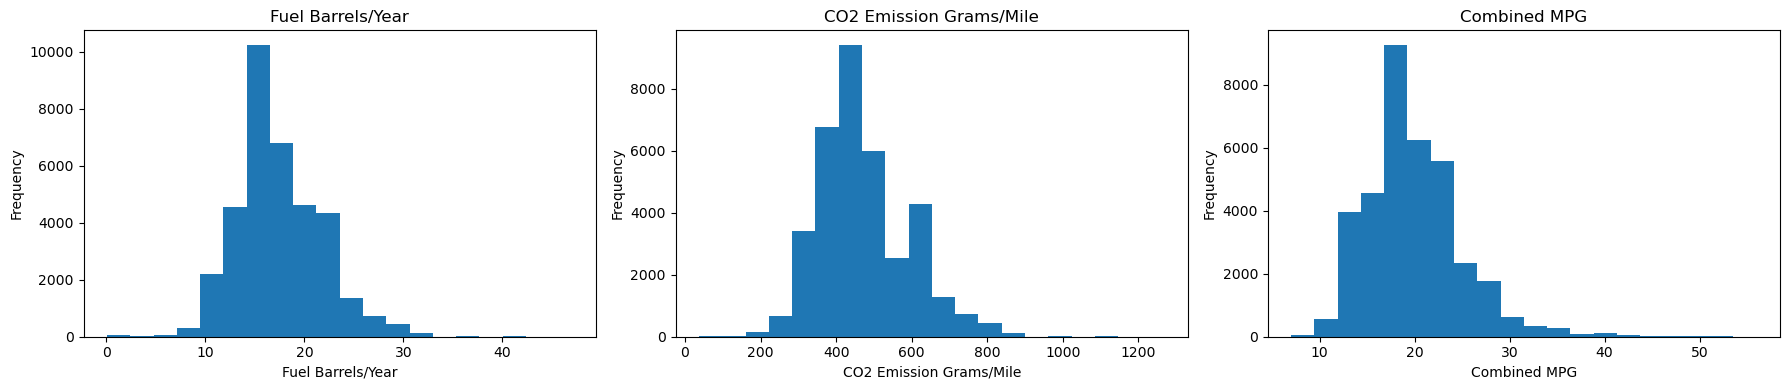

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].hist(vehicles['Fuel Barrels/Year'], bins=20)
axs[0].set_title('Fuel Barrels/Year')
axs[0].set_xlabel('Fuel Barrels/Year')
axs[0].set_ylabel('Frequency')

axs[1].hist(vehicles['CO2 Emission Grams/Mile'], bins=20)
axs[1].set_title('CO2 Emission Grams/Mile')
axs[1].set_xlabel('CO2 Emission Grams/Mile')
axs[1].set_ylabel('Frequency')

axs[2].hist(vehicles['Combined MPG'], bins=20)
axs[2].set_title('Combined MPG')
axs[2].set_xlabel('Combined MPG')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [22]:
# you answer here:
from scipy.stats import skew
for variable in ['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']:
    data = vehicles[variable]
    skewness = skew(data)
    print(f'{variable} - Skewness: {skewness}')
    

Fuel Barrels/Year - Skewness: 0.6382445784906976
CO2 Emission Grams/Mile - Skewness: 0.7416608937445333
Combined MPG - Skewness: 1.0677281511016457


***My answer***
- Skewness measures the lack of symmetry relative to the mean of a distribution.
- If the skewness is close to 0, this suggests that the distribution is symmetric (bell-shaped) and closer to a normal distribution. 
- Among the three variables, 'Fuel Barrels/Year' has the skewness coefficient closest to 0 (0.638). This suggests that its distribution is relatively closer to a symmetric bell-shaped normal distribution compared to the other two variables.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

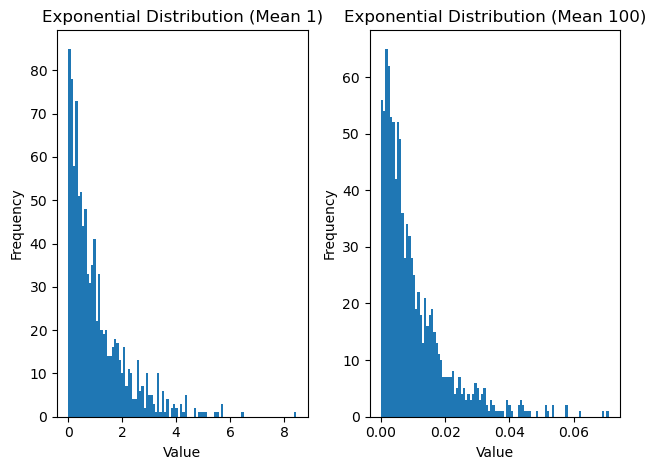

In [17]:
def generate_exponential_numbers(mean, size):
    scale = 1 / mean
    exponential_numbers = np.random.exponential(scale=scale, size=size)
    return exponential_numbers

mean_1 = 1
mean_100 = 100
size = 1000

exponential_numbers_mean_1 = generate_exponential_numbers(mean_1, size)
exponential_numbers_mean_100 = generate_exponential_numbers(mean_100, size)

#Plots
plt.subplot(1, 2, 1)
plt.hist(exponential_numbers_mean_1, bins=100)
plt.title('Exponential Distribution (Mean 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(exponential_numbers_mean_100, bins=100)
plt.title('Exponential Distribution (Mean 100)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


How are the two distributions different?

***My answer***
- When the mean of the exponential distribution is larger, it results in a distribution with a broader range of values. 
- This means that the data points are more spread out, and the distribution has a longer tail on the right side. 
- Conversely, when the mean is smaller, the distribution is more concentrated around lower values, and the data points are less spread out.
- When comparing the two exponential distributions with means of 1 and 100, you can observe that the distribution with a mean of 100 has more spread-out values

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [18]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

What is the probability that the customer will spend more than 15 minutes

In [19]:
lambda_inv = 10
exp_d = expon(scale=lambda_inv)  
exp_d.cdf(15)
probability_more_than_15 = 1 - exp_d.cdf(15) 
print("Probability of spending more than fifteen minutes:", probability_more_than_15)

Probability of spending more than fifteen minutes: 0.2231301601484298
